In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [264]:
df=pd.read_csv("train (2).csv")

In [265]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [266]:
df.shape

(891, 12)

In [267]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [268]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [270]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [271]:
df.shape

(891, 5)

In [272]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [273]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [274]:
mean=df["Age"].mean()
mean

29.69911764705882

In [275]:
df["Age"].replace(np.nan,mean,inplace=True)

In [276]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [277]:
dummies=pd.get_dummies(df[["Sex"]],drop_first=True)

In [278]:
df=pd.concat([df,dummies],axis=1)

In [279]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Sex_male
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1


In [280]:
df.drop(["Sex"],axis=1,inplace=True)

In [281]:
df.head(5)

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [282]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [283]:
feature=['Age','Fare']

In [284]:
df[feature]=sts.fit_transform(df[feature])

In [285]:
df.head(4)

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

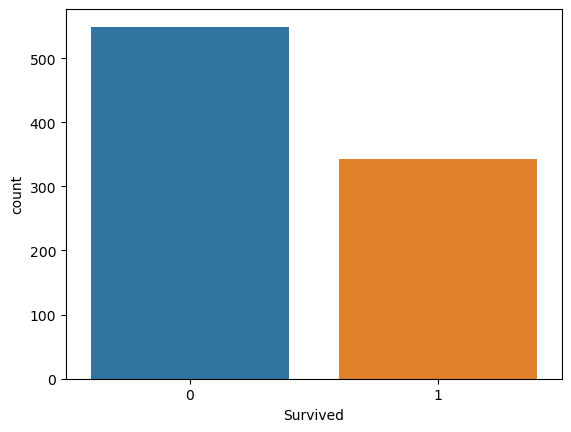

In [286]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

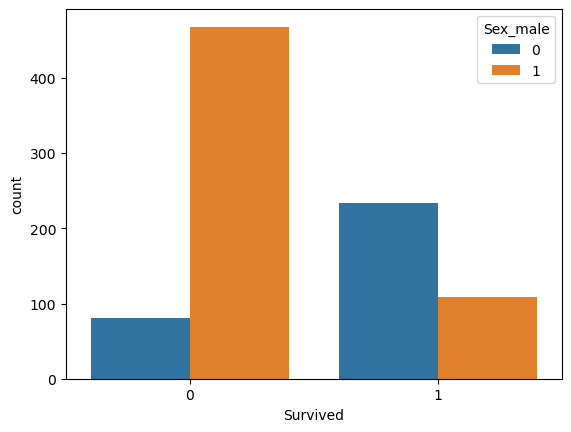

In [287]:
sns.countplot(x="Survived",hue="Sex_male",data=df)

In [288]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [289]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [290]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [291]:
model.score(X_train,y_train)


0.8089887640449438

In [292]:
model.score(X_test,y_test)

0.7761194029850746

In [293]:
predictions=model.predict(X_test)

In [294]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7761194029850746

In [295]:
from sklearn.tree import DecisionTreeClassifier

In [296]:
model2=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.8362760834670947
0.7873134328358209


In [297]:
model_bag=BaggingClassifier(base_estimator=model)

In [298]:
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression())

In [299]:
model_bag.score(X_train,y_train)

0.8138041733547352

In [300]:
model_bag.score(X_test,y_test)

0.7835820895522388

In [301]:
predictions=model_bag.predict(X_test)

In [302]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7835820895522388

In [303]:
model_ada=AdaBoostClassifier(base_estimator=model)

In [304]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression())

In [305]:
model_ada.score(X_train,y_train)

0.8057784911717496

In [306]:
model_ada.score(X_test,y_test)

0.7910447761194029

In [307]:
model_boost=GradientBoostingClassifier(n_estimators=9)


In [308]:
model_boost.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=9)

In [309]:
model_boost.score(X_train,y_train)

0.826645264847512

In [310]:
model_boost.score(X_test,y_test)

0.753731343283582

In [311]:
model_ran=RandomForestClassifier(max_depth=2)

In [312]:
model_ran.fit(X_train,y_train)

RandomForestClassifier(max_depth=2)

In [313]:
model_ran.score(X_train,y_train)

0.7993579454253612

In [314]:
model_ran.score(X_test,y_test)

0.7350746268656716

In [315]:
model = SVC()

In [316]:
model.fit(X_train,y_train)

SVC()

In [317]:
model.score(X_train,y_train)

0.8170144462279294

In [318]:
model.score(X_test,y_test)

0.7723880597014925

In [429]:
df1=pd.read_csv("test (2).csv")

In [430]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [431]:
df2=df1.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [432]:
df2.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [433]:
df2["Age"].fillna(df2["Age"].mean(),inplace=True)

In [434]:
df2["Fare"].fillna(df2["Fare"].mean(),inplace=True)

In [435]:
df2.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [436]:
dummies=pd.get_dummies(df2[["Sex"]],drop_first=True)

In [437]:
df2=pd.concat([df2,dummies],axis=1)


In [409]:
df2.head()

,Pclass,Sex,Age,Fare,Sex_male
0,3,male,34.5,7.8292,1
1,3,female,47.0,7.0000,0
2,2,male,62.0,9.6875,1
3,3,male,27.0,8.6625,1
4,3,female,22.0,12.2875,0


In [438]:
df2.drop("Sex",axis=1, inplace=True)

In [439]:
df2.head()

,Pclass,Age,Fare,Sex_male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [440]:
df2[feature]=sts.fit_transform(df2[feature])

In [441]:
df2.head()

,Pclass,Age,Fare,Sex_male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0


In [443]:
y_predicted=model.predict(df2)

In [399]:
submission=pd.DataFrame({
    "PassengerId":df1["PassengerId"],
    "Survived": y_predicted
})

In [446]:
submission.to_csv("titanic_submission.csv",index=False)